## Question 1: Exploratory Data Analysis


In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

In [4]:
def scatterPlot2d(features,labels):
    
    plt.rcParams['figure.figsize'] = [12,5]
    plt.rcParams['figure.dpi'] = 100
    
    plt.subplots_adjust(top=0.98,
                        bottom=0.06,
                        left=0.045,
                        right=0.97,
                        hspace=0.39,
                        wspace=0.175)
    n = features.shape[1] 
    indx = 1
    for i in range(n):
        for j in range(i,n):
            if not(i == j):
                if n%2 == 0:
                    plt.subplot(n//2,n-1,indx)
                else :
                    plt.subplot(n,(n-1)//2,indx)
                plt.scatter(features[:,i],features[:,j],c=labels,cmap=plt.cm.Set1,edgecolor='k')
                plt.xlabel('f'+str(i+1)); plt.ylabel('f'+str(j+1))
                indx += 1
    plt.show()

def tsnePlot2d(features,labels):
    plt.rcParams['figure.figsize'] = [5,3]
    plt.rcParams['figure.dpi'] = 100
    
    x_emb = TSNE(n_components=2).fit_transform(features)
    plt.scatter(x_emb[:,0],x_emb[:,1],c=labels,cmap=plt.cm.Set1,edgecolor='k')
    plt.title("TSNE PLOT")
    plt.show()

def pcaPlot2d(features,labels):
    
    plt.rcParams['figure.figsize'] = [5,3]
    plt.rcParams['figure.dpi'] = 100
    
    #     f = features.copy()
    #     f = (f - np.mean(f,axis=0))/np.array([np.std(f[:,i]) for i in range(features.shape[1])])
    scaler = StandardScaler()
    f = scaler.fit_transform(features)
    pca = PCA(n_components = 2)
    x_pca = pca.fit_transform(f)
    plt.scatter(x_pca[:,0],x_pca[:,1],c=labels,cmap=plt.cm.Set1,edgecolor='k')
    plt.title("PCA")
    plt.show()


def histogram(features,labels):
    plt.rcParams['figure.figsize'] = [12,8]
    plt.rcParams['figure.dpi'] = 100
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.hist(features[:,i],bins=20,color='green')
        plt.xlabel('bins(f'+str(i+1)+')')
        plt.ylabel('count')
    plt.show()


def qFiveData(features,labels):
	head = ['feature','Max Value','Average','Standard deviation']
	dat = []
	av = np.mean(features,axis=0)
	std = [np.std(features[:,i]) for i in range(features.shape[1])]
	mx = np.max(features,axis=0)
	f = np.array(['f1','f2','f3','f4'])
	dat = np.array([f,mx,av,std]).T
	return head,dat

In [5]:
p = pd.read_csv('iris.data',names=['f1','f2','f3','f4','label'])

### Part 1.1

In [6]:
print(p.head(5)) 
print("Number of samples: "+str(p.shape[0]))
print("Number of attributes: "+str(len(p.axes[1])))

    f1   f2   f3   f4        label
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
Number of samples: 150
Number of attributes: 5


### Part 1.2

In [7]:
nData = p.values
print("Shape of numpy array: " + str(nData.shape))

features = nData[:,0:4] # features 1.2.b.i
labels = nData[:,4] #labels 1.2.b.ii

uLabels = np.unique(labels) # 1.2.c
print("Unique elements of label array: "+str(uLabels))

# dictionary to map labels to numerical values 1.2.d
labelToNumbers = {d:k for (d,k) in zip(uLabels,range(len(uLabels)))}

# conversion 1.2.e
for d in uLabels:
	labels[labels == d] = labelToNumbers[d]

Shape of numpy array: (150, 5)
Unique elements of label array: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### Part 1.3

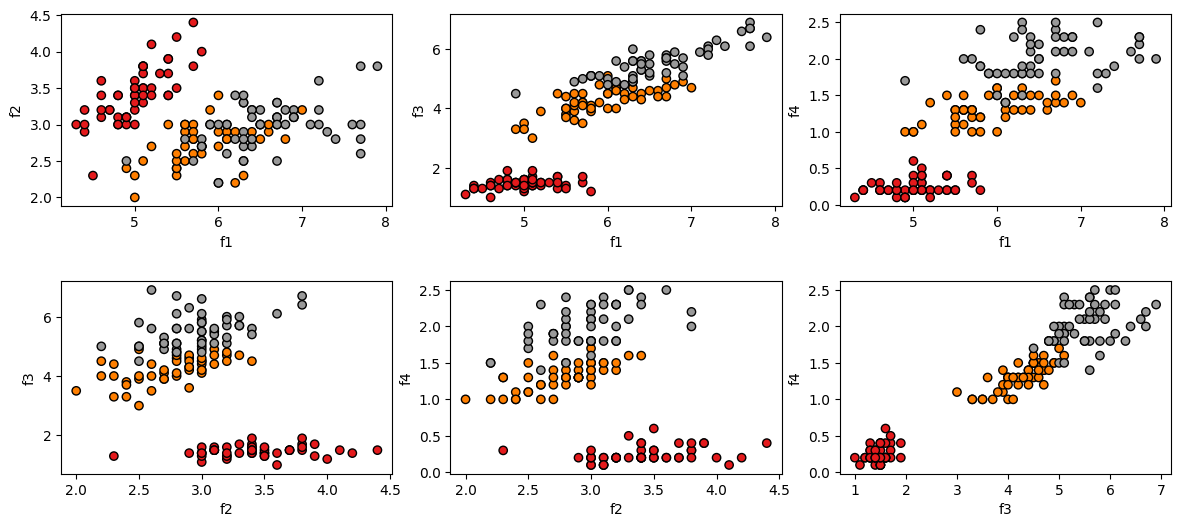

In [6]:
scatterPlot2d(features,labels)

F3 and F4 seperate the red class from other two using a linear boundary. In addition to previous point, it is also evident from the plot that gray class can be seperated from orange class using linear boundary at the cost of few outliers. Hence F3 and F4 outperforms the rest of attributes.

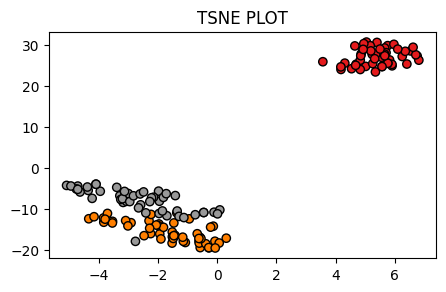

In [7]:
tsnePlot2d(features,labels)

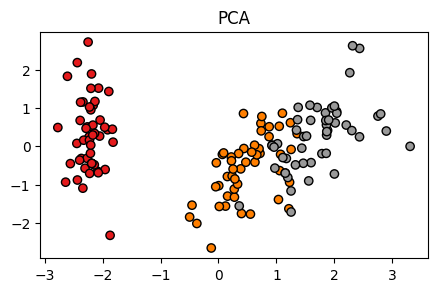

In [8]:
pcaPlot2d(features,labels)

### Part 1.4

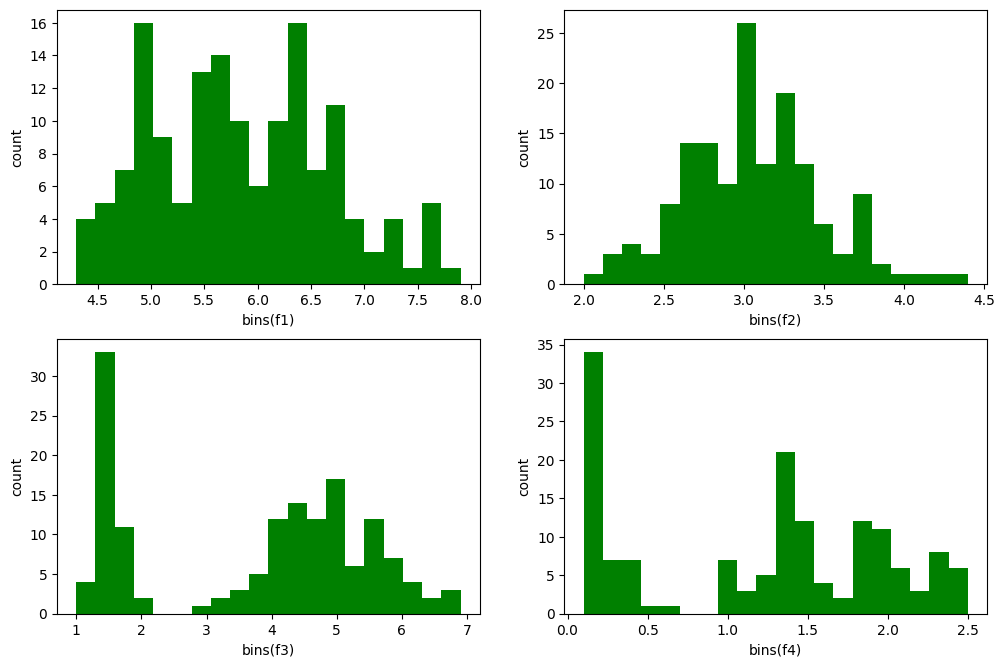

In [9]:
histogram(features,labels)

###### Comments:
- f1: values are distributed comparatively more in the middle regions than at the ends. It has count highs at differnt centres which makes it inappropriate to be modelled as gaussian distribution.
- f2: Histrogram shows a progressive distribution of values, first it increases steadily, after a certain threshold it decreases. 
- f3: Values are distributed around two different means one between 1-2 and other 3-7. Appears as a sum of two distributions.
- f4: Distriibution of values show two disconnected components, first region has very high count relative to other bins.
    

### Part 1.5

In [12]:
h,d = qFiveData(features,labels)
table = tabulate(d,headers=h)
print(table)

feature      Max Value    Average    Standard deviation
---------  -----------  ---------  --------------------
f1                 7.9    5.84333              0.825301
f2                 4.4    3.054                0.432147
f3                 6.9    3.75867              1.75853
f4                 2.5    1.19867              0.760613


## Question 2: Scikit Digit Dataset

In [13]:
from sklearn.datasets import load_digits

In [14]:
digits = load_digits()

# 2.1
X = digits.data
print("X Shape: "+str(X.shape))

# 2.2
Y = digits.target
print("-------------------\nY Shape: "+str(Y.shape))

# 2.3
Y_unique,counts = np.unique(Y,return_counts=True)
print("-------------------\nUnique Labels: ")
print(Y_unique)

# Resize 2.4
X_images = 	np.resize(X,(X.shape[0],8,8))
print("-------------------\nShape of sample: "+str(X_images[0].shape)) # 2.4.a
print('Shape of X_images: '+str(X_images.shape)) # 2.4.b

# 2.5
I = digits.images


X Shape: (1797, 64)
-------------------
Y Shape: (1797,)
-------------------
Unique Labels: 
[0 1 2 3 4 5 6 7 8 9]
-------------------
Shape of sample: (8, 8)
Shape of X_images: (1797, 8, 8)


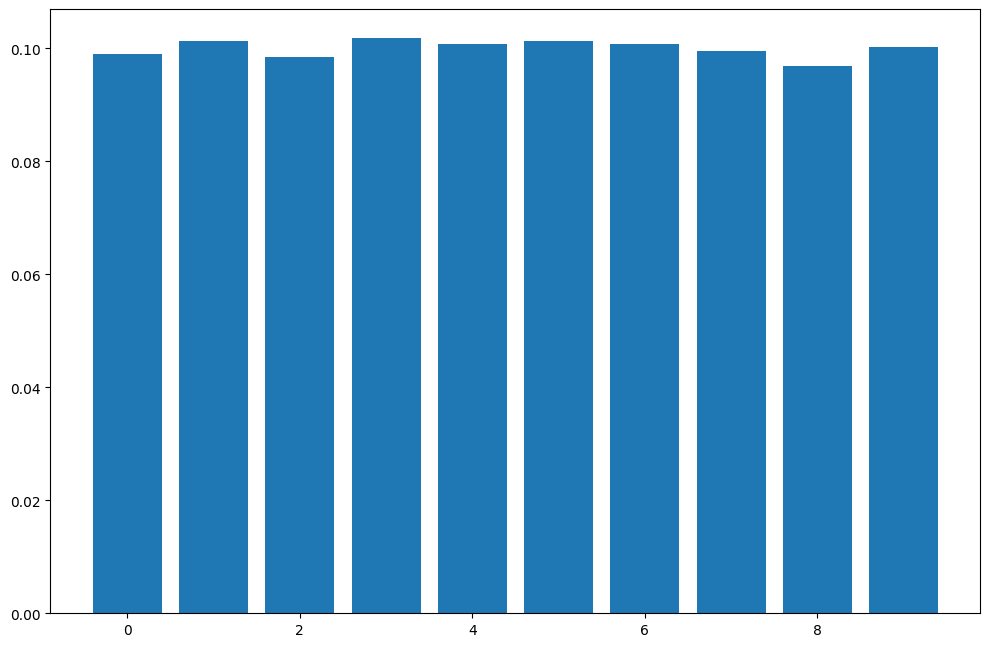

In [15]:
# 2.7
plt.bar(Y_unique,counts/np.sum(counts))
plt.show()

Comment: 
- Data points are almost uniformly distributed across all the classes. (2.7 )
- i--------------------------------------------------------------- (2.6)